In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')

In [5]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [7]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [9]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [13]:
my_time = df['pickup_datetime'][0]
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [14]:
df['Hour'] = df['EDTdate'].dt.hour

In [15]:
df['AMorPM'] = np.where(df['Hour'] < 12, 'am', 'pm')

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [17]:

df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [18]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [19]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [20]:
y_col = ['fare_amount']

In [21]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int32
AMorPM                            object
Weekday                           object
dtype: object

In [22]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [23]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [24]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [25]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [26]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [27]:
df['Weekday'].cat.codes.values 

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [28]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [29]:
cats = np.stack([hr, ampm, wkdy], axis = 1)

In [30]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [31]:
cats = torch.tensor(cats, dtype=torch.int64)

In [32]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [33]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [34]:
conts = torch.tensor(conts, dtype=torch.float)

In [35]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [36]:
y = torch.tensor(df[y_col].values, dtype=torch.float) #.reshape(-1, 1)

In [37]:
cats.shape

torch.Size([120000, 3])

In [38]:
conts.shape

torch.Size([120000, 6])

In [39]:
y.shape

torch.Size([120000, 1])

In [40]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [41]:
cat_szs

[24, 2, 7]

In [42]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [43]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [44]:
catz = cats[:4]

In [45]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [46]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [47]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [48]:
embeddingz = []

for i, e in enumerate(selfembeds):
    embeddingz.append(e(catz[:, i]))

In [49]:
embeddingz

[tensor([[ 2.1782e-01,  8.8506e-01, -9.8410e-02, -5.5833e-01, -6.6811e-01,
           2.0332e+00, -6.7569e-01, -3.4400e-01, -1.0683e+00,  1.6138e+00,
          -4.9264e-01,  1.6425e+00],
         [-8.8577e-01,  8.3723e-01,  1.5762e-01,  1.3314e+00,  9.8019e-01,
          -1.3280e+00,  6.7599e-01, -3.4522e-04, -1.6040e+00,  1.7974e-01,
          -1.7913e+00, -3.9012e-01],
         [ 8.8270e-01, -1.1471e+00, -6.8442e-02,  9.2215e-01, -1.6646e+00,
          -2.8255e+00,  8.9994e-01,  8.5680e-02, -7.7222e-01,  8.3301e-01,
           7.7329e-01,  1.8978e+00],
         [ 2.8983e-01, -3.6020e-01,  3.1385e-01, -6.7646e-01,  7.4221e-01,
           6.9844e-01,  1.1353e+00, -1.1952e+00,  6.8736e-01,  3.0761e-02,
          -7.6039e-01,  1.1992e+00]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.3083],
         [-0.3083],
         [-0.3083],
         [-1.0552]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.6183,  0.8903,  0.5970,  1.0944],
         [-0.3110,  1.3956, -0.0947, -1.3769],
         [-0.3

In [50]:
z = torch.cat(embeddingz, 1)

In [51]:
z

tensor([[ 2.1782e-01,  8.8506e-01, -9.8410e-02, -5.5833e-01, -6.6811e-01,
          2.0332e+00, -6.7569e-01, -3.4400e-01, -1.0683e+00,  1.6138e+00,
         -4.9264e-01,  1.6425e+00, -3.0834e-01, -1.6183e+00,  8.9028e-01,
          5.9702e-01,  1.0944e+00],
        [-8.8577e-01,  8.3723e-01,  1.5762e-01,  1.3314e+00,  9.8019e-01,
         -1.3280e+00,  6.7599e-01, -3.4522e-04, -1.6040e+00,  1.7974e-01,
         -1.7913e+00, -3.9012e-01, -3.0834e-01, -3.1101e-01,  1.3956e+00,
         -9.4666e-02, -1.3769e+00],
        [ 8.8270e-01, -1.1471e+00, -6.8442e-02,  9.2215e-01, -1.6646e+00,
         -2.8255e+00,  8.9994e-01,  8.5680e-02, -7.7222e-01,  8.3301e-01,
          7.7329e-01,  1.8978e+00, -3.0834e-01, -3.1101e-01,  1.3956e+00,
         -9.4666e-02, -1.3769e+00],
        [ 2.8983e-01, -3.6020e-01,  3.1385e-01, -6.7646e-01,  7.4221e-01,
          6.9844e-01,  1.1353e+00, -1.1952e+00,  6.8736e-01,  3.0761e-02,
         -7.6039e-01,  1.1992e+00, -1.0552e+00, -2.6183e-01, -2.1642e-01,
    

In [52]:
selfembeddrop = nn.Dropout(0.4)

In [53]:
z = selfembeddrop(z)

In [54]:
z

tensor([[ 0.0000e+00,  0.0000e+00, -0.0000e+00, -9.3055e-01, -1.1135e+00,
          0.0000e+00, -0.0000e+00, -5.7334e-01, -1.7806e+00,  2.6897e+00,
         -0.0000e+00,  2.7375e+00, -5.1390e-01, -2.6971e+00,  1.4838e+00,
          0.0000e+00,  1.8240e+00],
        [-0.0000e+00,  0.0000e+00,  0.0000e+00,  2.2190e+00,  0.0000e+00,
         -0.0000e+00,  1.1266e+00, -5.7537e-04, -0.0000e+00,  2.9956e-01,
         -0.0000e+00, -0.0000e+00, -5.1390e-01, -0.0000e+00,  0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [ 1.4712e+00, -1.9118e+00, -0.0000e+00,  0.0000e+00, -0.0000e+00,
         -4.7092e+00,  0.0000e+00,  1.4280e-01, -0.0000e+00,  0.0000e+00,
          0.0000e+00,  3.1631e+00, -5.1390e-01, -5.1835e-01,  2.3260e+00,
         -0.0000e+00, -2.2948e+00],
        [ 4.8304e-01, -6.0034e-01,  5.2309e-01, -1.1274e+00,  0.0000e+00,
          1.1641e+00,  1.8921e+00, -1.9920e+00,  1.1456e+00,  5.1268e-02,
         -1.2673e+00,  1.9987e+00, -1.7587e+00, -0.0000e+00, -3.6070e-01,
    

In [55]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5) -> None:
        
        # layers = [200, 100, 50] -> 200 neurons in the 1st layer, then 100, and then 50.
        
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_emb + n_cont 
        
        for i in layers: # num of neuron in each layers 
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))
        
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x 
        

In [73]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)

In [74]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [75]:
criterion = nn.MSELoss() # np.sqrt(MSE) --> RMSE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [76]:
batch_size = 60000
test_size = int(batch_size * 0.2)

In [77]:
# Data shuffled already
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [78]:
len(cat_test)

12000

In [91]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) #RMSE
    losses.append(loss.detach().numpy())
    
    if i%10 == 1:
        print(f'epoch: {i} loss is {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
duration = time.time() - start_time
print(f'Training took {duration / 60} minutes')

epoch: 1 loss is 3.699401378631592
epoch: 11 loss is 3.662433624267578
epoch: 21 loss is 3.6124377250671387
epoch: 31 loss is 3.643653392791748
epoch: 41 loss is 3.5953378677368164
epoch: 51 loss is 3.5787906646728516
epoch: 61 loss is 3.5713510513305664
epoch: 71 loss is 3.5509955883026123
epoch: 81 loss is 3.527979850769043
epoch: 91 loss is 3.5269861221313477
epoch: 101 loss is 3.4755375385284424
epoch: 111 loss is 3.497563600540161
epoch: 121 loss is 3.488032817840576
epoch: 131 loss is 3.4607458114624023
epoch: 141 loss is 3.4705398082733154
epoch: 151 loss is 3.4525420665740967
epoch: 161 loss is 3.4467966556549072
epoch: 171 loss is 3.4303011894226074
epoch: 181 loss is 3.420546054840088
epoch: 191 loss is 3.4037866592407227
epoch: 201 loss is 3.3934502601623535
epoch: 211 loss is 3.3816332817077637
epoch: 221 loss is 3.36619234085083
epoch: 231 loss is 3.3667798042297363
epoch: 241 loss is 3.356356620788574
epoch: 251 loss is 3.326481819152832
epoch: 261 loss is 3.3401002883911

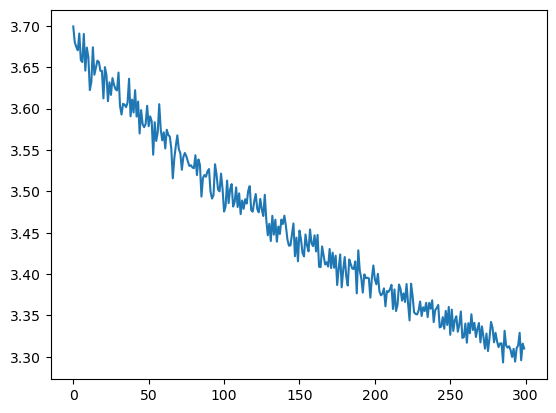

In [93]:
plt.plot(range(epochs), losses)
# losses

In [94]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [95]:
loss

tensor(3.2742)

In [98]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i}.) PREDICTED: {y_val[i].item():8.4f} TRUE: {y_test[i].item():8.4f} DIFF: {diff:8.4f}')

0.) PREDICTED:   3.9596 TRUE:   2.9000 DIFF:   1.0596
1.) PREDICTED:  18.2971 TRUE:   5.7000 DIFF:  12.5971
2.) PREDICTED:   6.6675 TRUE:   7.7000 DIFF:   1.0325
3.) PREDICTED:  12.8419 TRUE:  12.5000 DIFF:   0.3419
4.) PREDICTED:   4.4626 TRUE:   4.1000 DIFF:   0.3626
5.) PREDICTED:   4.8801 TRUE:   5.3000 DIFF:   0.4199
6.) PREDICTED:   5.4210 TRUE:   3.7000 DIFF:   1.7210
7.) PREDICTED:  16.4638 TRUE:  14.5000 DIFF:   1.9638
8.) PREDICTED:   4.7374 TRUE:   5.7000 DIFF:   0.9626
9.) PREDICTED:  10.0206 TRUE:  10.1000 DIFF:   0.0794


In [99]:
torch.save(model.state_dict(), 'TaxiModel.pt')